In [1]:
import os
os.listdir()

['.env',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.~lock.data.xls#',
 'cleaned_pro-ana-data.xls',
 'cleaned_pro-recovery-data.xls',
 'data.csv',
 'data.xls',
 'EDA_cleaning.ipynb',
 'invalid_words.txt',
 'model_tuning.ipynb',
 'pro-ana-data.xls',
 'pro-recovery-data.xls',
 'proanavsprorecovery.zip']

In [2]:
import pandas

data = pandas.read_csv('data.csv')

In [3]:
data.head()

,id,label,text
0,1_0,0,find out more here
1,2_0,0,i had a long battle with anorexia
2,3_0,0,those thoughts telling me that if i just lost...
3,4_0,0,the trouble is that never happened
4,5_0,0,there was never a magic number


In [4]:
ok_data = data[data['label'] == 0]
ana_data = data[data['label'] == 1]

In [5]:
ok_data.head(n=50)

,id,label,text
0,1_0,0,find out more here
1,2_0,0,i had a long battle with anorexia
2,3_0,0,those thoughts telling me that if i just lost...
3,4_0,0,the trouble is that never happened
4,5_0,0,there was never a magic number
5,6_0,0,it was never enough
6,7_0,0,whatever i did anorexia would still scream in...
7,8_0,0,i chased those thoughts and followed those fee...
8,9_0,0,to reach an impossible goal that would finall...
9,10_0,0,those thoughts landed me with one day care and...


In [6]:
ana_data.head()

,id,label,text
1234,1_1,1,tcb-script]as you have learned about pro-ana a...
1235,2_1,1,"because of the busy day schedule, it is tough ..."
1236,3_1,1,more and more people are thinking about losing...
1237,4_1,1,the most popular trending lifestyle is pro ana...
1238,5_1,1,we know that diet is definitely not an easy ta...


In [7]:
import string

special_chars = set(string.punctuation)

In [8]:
import wordninja
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text: str):
    text = text.lower()   
    remove_string = 'tcb-script]'  # random string appearing in some text samples
    text = text.replace(remove_string, '')
    
    tokens = separate_words(text)
    
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    tokens = [word for word in tokens if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    return tokens
    
def separate_words(text):
    return wordninja.split(text)

[nltk_data] Downloading package stopwords to /home/gabi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
td = ana_data.iloc[269]
clean_text(td['text'])

['served',
 'entire',
 'steamed',
 'artichoke',
 'vegan',
 'lemon',
 'butter',
 'dipping',
 'sauce',
 'dinner',
 'cheese',
 'vegan',
 'cheese',
 'pizza',
 'loaded',
 'veggies',
 'another',
 'diet',
 'worth',
 'trying',
 'vegan',
 'model',
 'diet',
 'vegan',
 'model',
 'diet',
 'breakfast',
 'lunch',
 'dinner',
 'slice',
 'reduced',
 'calorie',
 'bread',
 'make',
 'sure',
 'bread',
 'low',
 'calorie',
 'one',
 'cups',
 'black',
 'coffee',
 'cal',
 'sweetener',
 'without',
 'sweetener',
 'calories',
 'total',
 'calories',
 'gm',
 'fat',
 'medium',
 'large',
 'apple',
 'calories',
 'total',
 'calories',
 'gram',
 'fat',
 'baby',
 'carrots',
 'calories',
 'total',
 'calories',
 'gram',
 'fat',
 'total',
 'calories',
 'gram',
 'fat',
 'mixed',
 'carb',
 'diet',
 'breakfast',
 'lunch',
 'dinner',
 'cup',
 'fat',
 'free',
 'sugar',
 'free',
 'yogurt',
 'flavor',
 'calories',
 'total',
 'calories',
 'grams',
 'fat',
 'slices',
 'reduced',
 'calorie',
 'bread',
 'low',
 'calorie',
 'calories',


In [10]:
ana_text_cleaned = ana_data['text'].apply(clean_text)
print(ana_text_cleaned.head())

ok_text_cleaned = ok_data['text'].apply(clean_text)
print(ok_text_cleaned.head())

1234    [learned, pro, lets, get, details, pro, avoid,...
1235    [busy, day, schedule, tough, continue, diet, p...
1236    [people, thinking, losing, weight, becoming, t...
1237    [popular, trending, lifestyle, pro, one, tends...
1238    [know, diet, definitely, easy, task, therefore...
Name: text, dtype: object
0                                               [find]
1                             [long, battle, anorexia]
2    [thoughts, telling, lost, x, amount, weight, w...
3                           [trouble, never, happened]
4                               [never, magic, number]
Name: text, dtype: object


<IPython.core.display.Javascript object>


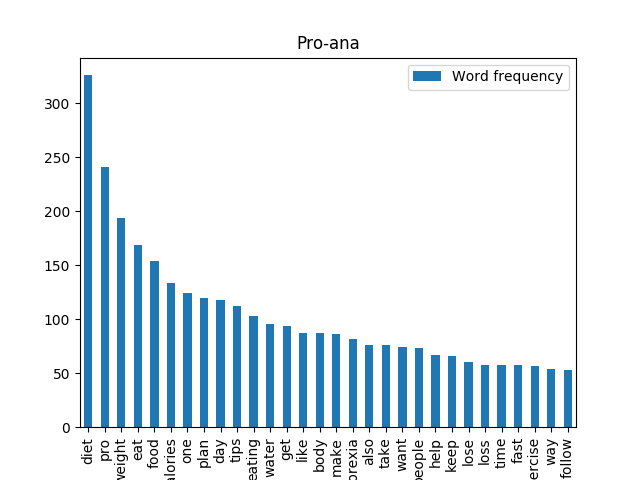

<IPython.core.display.Javascript object>


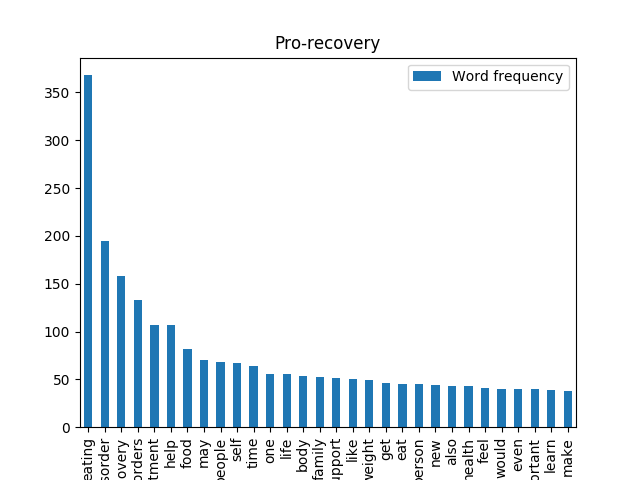

Ana unique words: 3664
Ok unique words: 3817


In [11]:
import matplotlib

from functools import reduce
from collections import Counter
%matplotlib notebook

def plot_hist(text_list, n_top=30, title=""):
    word_counts = Counter(text_list)
    df = pandas.DataFrame.from_dict(word_counts, orient='index')
    df.columns = ['Word frequency']
    
    df = df.nlargest(n_top, 'Word frequency')
    df.plot(kind='bar', title=title)

ana_list = reduce(lambda a,b: a + b, ana_text_cleaned, [])
ok_list = reduce(lambda a,b: a + b, ok_text_cleaned, [])

plot_hist(ana_list, title="Pro-ana")
plot_hist(ok_list, title="Pro-recovery")

print(f"Ana unique words: {len(set(ana_list))}")
print(f"Ok unique words: {len(set(ok_list))}")

# Model

In [12]:
from sklearn.model_selection import train_test_split

cleaned_data = data.copy()
cleaned_data['text'] = cleaned_data['text'].apply(lambda x: " ".join(clean_text(x)))
print(cleaned_data.head())

train, test = train_test_split(cleaned_data, test_size=0.1)
train_X, train_y = train['text'], train['label']
test_X, test_y = test['text'], test['label']

    id  label                                               text
0  1_0      0                                               find
1  2_0      0                               long battle anorexia
2  3_0      0  thoughts telling lost x amount weight would ac...
3  4_0      0                             trouble never happened
4  5_0      0                                 never magic number


In [13]:
import tensorflow as tf
tf.test.is_gpu_available()

False

In [14]:
from word2vec_keras import Word2VecKeras
model = Word2VecKeras()
model.train(train_X.to_list(),
            train_y,
            w2v_size=200,  # much smaller n words
            w2v_epochs=100,
            k_epochs=100,
            k_lstm_neurons=50)

Using TensorFlow backend.
2020-01-17 15:20:38,343 : INFO : Build & train Word2Vec model
2020-01-17 15:20:38,344 : INFO : collecting all words and their counts
2020-01-17 15:20:38,344 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-01-17 15:20:38,348 : INFO : collected 5570 word types from a corpus of 26327 raw words and 3032 sentences
2020-01-17 15:20:38,348 : INFO : Loading a fresh vocabulary
2020-01-17 15:20:38,354 : INFO : effective_min_count=1 retains 5570 unique words (100% of original 5570, drops 0)
2020-01-17 15:20:38,354 : INFO : effective_min_count=1 leaves 26327 word corpus (100% of original 26327, drops 0)
2020-01-17 15:20:38,363 : INFO : deleting the raw counts dictionary of 5570 items
2020-01-17 15:20:38,364 : INFO : sample=0.001 downsamples 35 most-common words
2020-01-17 15:20:38,364 : INFO : downsampling leaves estimated 24490 word corpus (93.0% of prior 26327)
2020-01-17 15:20:38,369 : INFO : estimated required memory for 5570 words and 

2020-01-17 15:20:39,110 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:39,110 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:39,110 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:39,110 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:39,110 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:39,111 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:39,114 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:39,115 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:39,118 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:39,118 : INFO : EPOCH - 5 : training on 26327 raw words (24514 effective words) took 0.0s, 1703720 effective words/s
2020-01-17 15:20:39,124 : INFO : worker thread 

2020-01-17 15:20:39,218 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:39,218 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:39,218 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:39,221 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:39,223 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:39,225 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:39,225 : INFO : EPOCH - 10 : training on 26327 raw words (24495 effective words) took 0.0s, 1469425 effective words/s
2020-01-17 15:20:39,232 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:39,235 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:39,236 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:39,236 : INFO : worker thr

2020-01-17 15:20:39,338 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:39,339 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:39,342 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:39,342 : INFO : EPOCH - 15 : training on 26327 raw words (24476 effective words) took 0.0s, 1490691 effective words/s
2020-01-17 15:20:39,348 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:39,350 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:39,352 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:39,352 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:39,352 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:39,352 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:39,353 : INFO : worker 

2020-01-17 15:20:39,446 : INFO : EPOCH - 20 : training on 26327 raw words (24521 effective words) took 0.0s, 1549549 effective words/s
2020-01-17 15:20:39,451 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:39,451 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:39,455 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:39,457 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:39,457 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:39,457 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:39,458 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:39,458 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:39,458 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:39,458 : INFO : worker 

2020-01-17 15:20:39,562 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:39,562 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:39,563 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:39,563 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:39,563 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:39,563 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:39,564 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:39,564 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:39,564 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:39,564 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:39,565 : INFO : worker thread finished; awaiting finish of 4 more th

2020-01-17 15:20:39,668 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:39,668 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:39,669 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:39,669 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:39,669 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:39,669 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:39,670 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:39,670 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:39,670 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:39,673 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:39,674 : INFO : worker thread finished; awaiting finish of 1 more threa

2020-01-17 15:20:39,771 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:39,772 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:39,772 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:39,772 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:39,772 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:39,772 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:39,778 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:39,779 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:39,781 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:39,782 : INFO : EPOCH - 36 : training on 26327 raw words (24492 effective words) took 0.0s, 1330094 effective words/s
2020-01-17 15:20:39,787 : INFO : worker thread

2020-01-17 15:20:39,876 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:39,876 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:39,876 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:39,880 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:39,880 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:39,884 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:39,884 : INFO : EPOCH - 41 : training on 26327 raw words (24455 effective words) took 0.0s, 1497506 effective words/s
2020-01-17 15:20:39,890 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:39,891 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:39,893 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:39,894 : INFO : worker thr

2020-01-17 15:20:39,981 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:39,981 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:39,988 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:39,988 : INFO : EPOCH - 46 : training on 26327 raw words (24442 effective words) took 0.0s, 1230549 effective words/s
2020-01-17 15:20:39,997 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:39,998 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:39,999 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:39,999 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:40,000 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,000 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,000 : INFO : worker 

2020-01-17 15:20:40,095 : INFO : EPOCH - 51 : training on 26327 raw words (24449 effective words) took 0.0s, 1566631 effective words/s
2020-01-17 15:20:40,103 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:40,105 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:40,106 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:40,106 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:40,106 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,106 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,107 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:40,107 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:40,107 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:40,107 : INFO : worker 

2020-01-17 15:20:40,209 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:40,213 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:40,213 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:40,214 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,214 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,215 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:40,215 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:40,215 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:40,215 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:40,215 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:40,216 : INFO : worker thread finished; awaiting finish of 4 more th

2020-01-17 15:20:40,314 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,315 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,315 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:40,315 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:40,315 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:40,316 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:40,316 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:40,316 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:40,316 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:40,320 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:40,323 : INFO : worker thread finished; awaiting finish of 1 more threa

2020-01-17 15:20:40,421 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:40,422 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:40,422 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:40,422 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:40,422 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:40,423 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:40,426 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:40,426 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:40,430 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:40,430 : INFO : EPOCH - 67 : training on 26327 raw words (24469 effective words) took 0.0s, 1387069 effective words/s
2020-01-17 15:20:40,438 : INFO : worker thread

2020-01-17 15:20:40,524 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:40,524 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:40,525 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:40,527 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:40,528 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:40,530 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:40,530 : INFO : EPOCH - 72 : training on 26327 raw words (24450 effective words) took 0.0s, 1749652 effective words/s
2020-01-17 15:20:40,536 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:40,538 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:40,540 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:40,542 : INFO : worker thr

2020-01-17 15:20:40,629 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:40,629 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:40,633 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:40,633 : INFO : EPOCH - 77 : training on 26327 raw words (24483 effective words) took 0.0s, 1601320 effective words/s
2020-01-17 15:20:40,643 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:40,644 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:40,645 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:40,646 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:40,646 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,646 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,646 : INFO : worker 

2020-01-17 15:20:40,743 : INFO : EPOCH - 82 : training on 26327 raw words (24459 effective words) took 0.0s, 1693073 effective words/s
2020-01-17 15:20:40,748 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-17 15:20:40,750 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:40,751 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:40,753 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:40,753 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,754 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,754 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:40,754 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:40,755 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:40,755 : INFO : worker 

2020-01-17 15:20:40,857 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-17 15:20:40,858 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-17 15:20:40,859 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-17 15:20:40,859 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,859 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,860 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:40,860 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:40,860 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:40,860 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:40,861 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:40,861 : INFO : worker thread finished; awaiting finish of 4 more th

2020-01-17 15:20:40,966 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-17 15:20:40,967 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-17 15:20:40,967 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-17 15:20:40,967 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:40,968 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:40,968 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:40,968 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:40,968 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:40,969 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:40,972 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:40,973 : INFO : worker thread finished; awaiting finish of 1 more threa

2020-01-17 15:20:41,074 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-17 15:20:41,075 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-17 15:20:41,075 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-17 15:20:41,075 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-17 15:20:41,075 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-17 15:20:41,076 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-17 15:20:41,079 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-17 15:20:41,080 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-17 15:20:41,083 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-17 15:20:41,083 : INFO : EPOCH - 98 : training on 26327 raw words (24502 effective words) took 0.0s, 1503962 effective words/s
2020-01-17 15:20:41,089 : INFO : worker thread

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 200)          1114200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                50200     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6528      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

/media/win_hdd/Gabi/Code/mff/ML/NN_project/.env/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/media/win_hdd/Gabi/Code/mff/ML/NN_project/.env/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3032/3032 [==============================] - 4s 1ms/step - loss: 0.4388 - accuracy: 0.8077
Epoch 3/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.4153 - accuracy: 0.8133
Epoch 4/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.4015 - accuracy: 0.8183
Epoch 5/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.3940 - accuracy: 0.8278
Epoch 6/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.3881 - accuracy: 0.8301
Epoch 7/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.3726 - accuracy: 0.8397
Epoch 8/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.3675 - accuracy: 0.8361
Epoch 9/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.3701 - accuracy: 0.8364
Epoch 10/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.3636 - accuracy: 0.8381
Epoch 11/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.3553

Epoch 81/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1333 - accuracy: 0.9426
Epoch 82/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1311 - accuracy: 0.9466
Epoch 83/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1181 - accuracy: 0.9558
Epoch 84/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1282 - accuracy: 0.9439
Epoch 85/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1186 - accuracy: 0.9469
Epoch 86/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1154 - accuracy: 0.9499
Epoch 87/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1166 - accuracy: 0.9485
Epoch 88/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1079 - accuracy: 0.9525
Epoch 89/100
3032/3032 [==============================] - 4s 1ms/step - loss: 0.1319 - accuracy: 0.9525
Epoch 90/100
3032/3032 [==============================] - 4s 1ms

2020-01-17 15:27:46,854 : INFO : Done


In [15]:
res = []

for text, label in zip(test_X, test_y):
    try:
        pred = model.predict(text)
        res.append(pred)
        print(f"{pred}, orig: {label}")
    except IndexError as e:
        print(e)
        res.append(None)

{'label': 1, 'confidence': 0.9595256447792053, 'elapsed_time': 0.11244082450866699}, orig: 1
{'label': 1, 'confidence': 0.9440537095069885, 'elapsed_time': 0.016882658004760742}, orig: 0
{'label': 1, 'confidence': 0.6819871068000793, 'elapsed_time': 0.015101432800292969}, orig: 1
{'label': 0, 'confidence': 0.971372663974762, 'elapsed_time': 0.025896549224853516}, orig: 0
{'label': 1, 'confidence': 0.9440537095069885, 'elapsed_time': 0.023058176040649414}, orig: 1
{'label': 0, 'confidence': 0.9585273861885071, 'elapsed_time': 0.014652252197265625}, orig: 1
{'label': 1, 'confidence': 0.9968776702880859, 'elapsed_time': 0.02395343780517578}, orig: 1
{'label': 1, 'confidence': 0.6799193024635315, 'elapsed_time': 0.0170743465423584}, orig: 1
{'label': 1, 'confidence': 0.9935176372528076, 'elapsed_time': 0.022335290908813477}, orig: 0
{'label': 1, 'confidence': 0.8006052374839783, 'elapsed_time': 0.026093482971191406}, orig: 1
{'label': 1, 'confidence': 0.9532668590545654, 'elapsed_time': 0.

{'label': 1, 'confidence': 0.994475781917572, 'elapsed_time': 0.016587257385253906}, orig: 1
{'label': 0, 'confidence': 0.9613429307937622, 'elapsed_time': 0.02299642562866211}, orig: 0
{'label': 1, 'confidence': 0.9996838569641113, 'elapsed_time': 0.014860153198242188}, orig: 1
{'label': 0, 'confidence': 0.9745606780052185, 'elapsed_time': 0.015817880630493164}, orig: 0
{'label': 0, 'confidence': 0.5976141095161438, 'elapsed_time': 0.02555704116821289}, orig: 1
{'label': 0, 'confidence': 0.5857230424880981, 'elapsed_time': 0.017465829849243164}, orig: 1
{'label': 1, 'confidence': 0.8350489139556885, 'elapsed_time': 0.023871183395385742}, orig: 0
{'label': 0, 'confidence': 0.9958567023277283, 'elapsed_time': 0.014828920364379883}, orig: 0
{'label': 1, 'confidence': 0.9893767833709717, 'elapsed_time': 0.026421308517456055}, orig: 1
{'label': 1, 'confidence': 0.987215518951416, 'elapsed_time': 0.014993906021118164}, orig: 1
{'label': 1, 'confidence': 0.583690881729126, 'elapsed_time': 0.

{'label': 1, 'confidence': 0.7363675236701965, 'elapsed_time': 0.015548229217529297}, orig: 1
{'label': 0, 'confidence': 0.8487957119941711, 'elapsed_time': 0.014528989791870117}, orig: 0
{'label': 0, 'confidence': 0.5857230424880981, 'elapsed_time': 0.018138885498046875}, orig: 1
{'label': 0, 'confidence': 0.9731248617172241, 'elapsed_time': 0.01523447036743164}, orig: 0
{'label': 1, 'confidence': 0.9078575372695923, 'elapsed_time': 0.024624347686767578}, orig: 1
{'label': 0, 'confidence': 0.697672963142395, 'elapsed_time': 0.020356416702270508}, orig: 0
{'label': 1, 'confidence': 0.7116480469703674, 'elapsed_time': 0.01553201675415039}, orig: 1
{'label': 1, 'confidence': 0.9963829517364502, 'elapsed_time': 0.02589869499206543}, orig: 1
{'label': 1, 'confidence': 0.995949387550354, 'elapsed_time': 0.01619410514831543}, orig: 1
{'label': 1, 'confidence': 0.9158822894096375, 'elapsed_time': 0.014032840728759766}, orig: 0
{'label': 1, 'confidence': 0.8478462100028992, 'elapsed_time': 0.0

{'label': 0, 'confidence': 0.9898215532302856, 'elapsed_time': 0.02716970443725586}, orig: 0
{'label': 1, 'confidence': 0.9523123502731323, 'elapsed_time': 0.018236160278320312}, orig: 1
{'label': 1, 'confidence': 0.8279341459274292, 'elapsed_time': 0.017088651657104492}, orig: 1
{'label': 1, 'confidence': 0.8624558448791504, 'elapsed_time': 0.019681930541992188}, orig: 1
{'label': 1, 'confidence': 0.7413533926010132, 'elapsed_time': 0.02089381217956543}, orig: 1
{'label': 1, 'confidence': 0.6513704657554626, 'elapsed_time': 0.01926398277282715}, orig: 1
{'label': 1, 'confidence': 0.6755989193916321, 'elapsed_time': 0.02177143096923828}, orig: 0
{'label': 1, 'confidence': 0.9173876047134399, 'elapsed_time': 0.018953800201416016}, orig: 1
{'label': 1, 'confidence': 0.7621570229530334, 'elapsed_time': 0.02085280418395996}, orig: 0
{'label': 1, 'confidence': 0.946682333946228, 'elapsed_time': 0.03339862823486328}, orig: 1
{'label': 1, 'confidence': 0.9073598384857178, 'elapsed_time': 0.01

In [16]:
from sklearn.metrics import accuracy_score

none_count = 0
res2 = []
test2 = []

for r, t in zip(res, test_y):
    if r is not None:
        res2.append(r['label'])
        test2.append(t)
    else:
        none_count += 1
        
print(none_count)
accuracy_score(test2, res2)

2


0.6597014925373135

In [17]:
import numpy as np

test2_arr = np.array(test2)
res2_arr = np.array(res2)

filter_inds = test2_arr != res2_arr

